
# Project: Investigate a Dataset (TMDb_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 Overview
This data set contains information about 10 thousand movies collected from The Movie Database (TMDb),I did this analysis to help films directors,actors,Authors to make a decision and improve thier work 
### The Research Questions
<ul>
<ol>1-what are production company that his movies has the highest popularity?</ol>  
<ol>2-what are genres of movie have the highest popularity?</ol>
<ol>3-Do movie budgets effect in number of votes ?</ol>
<ol>4-Do movie budgets effect in revenue?</ol>
<ol>5-who are  the top directors</ol>
<ol>6-does movies number increase or decrease over years?</ol>
</ul> 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling



In [5]:
# load data
df = pd.read_csv('tmdb-movies.csv')
# Print the first 5 rows in the file
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#chesk the names of the columns in the dataset
print(list(df.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


there is some columns I dont needs and don't serves my investigation so I will remove them this will help to process the data analysis faster 

In [5]:
# descriptive statistics for each column from in dataset.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


budget and revenue have zero value which may case effect badly in my investigation I will deal with this in the clean section

In [14]:
# Print summary of TMDb file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

heir is some columns in this dataset contain null value and release_date  Type is string I should change the Datatype to date  and remove null value 

In [15]:
# the dataset contain 21 columns and 10,866 rows
df.shape

(10866, 21)



### Data Cleaning 
<ul>
<ol> 1-Drop the duplicacy if there any.</ol>
<ol> 2-Delete columns we don't need.</ol>
<ol>3-drop null value in dataset.</ol>
<ol>4-The type of the release_date column is string, we need to change it to datetime.</ol>
</ul>

In [6]:
# Delete unimportant columns
df_drop = ["id","imdb_id","homepage","tagline","keywords","overview"]
df.drop(df_drop, inplace=True, axis=1)

In [7]:
# Check for duplicates in the dataset
sum(df.duplicated())

1

In [8]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
sum(df.duplicated())

0

In [10]:
# Convert release_date type from string to datetime 
df["release_date"] = pd.to_datetime(df["release_date"])

In [11]:
# Drop all null value 
df = df.dropna()

In [12]:
# Replace all values of 0 with NAN
df = df.replace(0, np.nan)

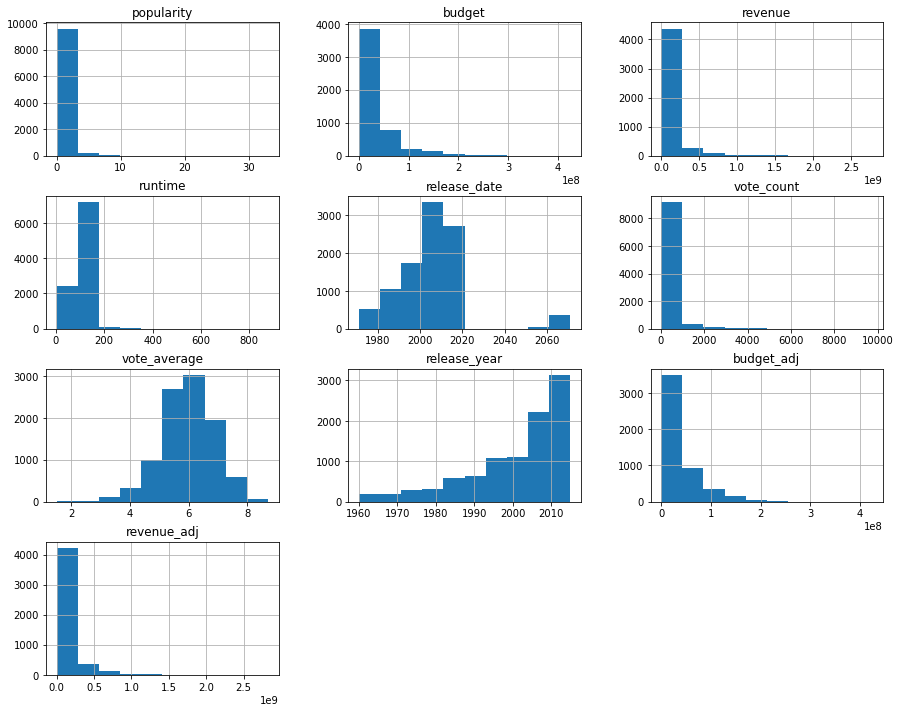

In [13]:
#histogram of whole dataset 
df.hist(figsize = (15,12)); 

<a id='eda'></a>
## Exploratory Data Analysis

In this step, I will explore the data to answer the below question and plot different visualizations to identify patterns and dependencies.

### Research Question 1 (what are production company that his movies has the highest popularity)

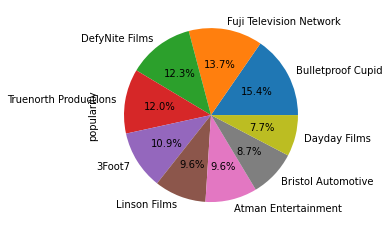

In [14]:
# split production companies  string, at |, explode the list to rows
production_company_df= df.assign(production_companies=df['production_companies'].str.split('|')).explode('production_companies')
#make group for each production company and get average popularity 
Top10_production_company =production_company_df.groupby('production_companies').popularity.mean().sort_values(ascending=False)[0:9]
Top10_production_company.plot.pie(autopct="%.1f%%");


As we can see from the figure that Bulletproof Cupid company has the hight popularity 

### Research Question 2  (what are  genres of movie have the highest popularity?)

In [44]:
def barplot(df,Xvar):
    #this function to bulid bar chart plot it's take two argument dataset, x axis 
    # split string, at |, explode the list to rows
    #make group for each Xvar  and get average popularity 
    Xvar_df=df.assign(genres=df[Xvar].str.split('|')).explode(Xvar)
    Top10_Xvar=Xvar_df.groupby(Xvar).popularity.mean().sort_values(ascending=False)[0:9]
    #array to bar chart color
    c=['#800000','#FAF0E6','#20B2AA','#DAA520','#FA8072','#A0522D','#FF6347','#DDA0DD','#FFEFD5']
    #plot
    Top10_Xvar.plot.bar(x=Xvar , y="popularity", color=c);
    #add Y lable
    plt.ylabel("popularity")
    #add title
    plt.title(f'Top 10 {Xvar} baed in popularity average'.title() )

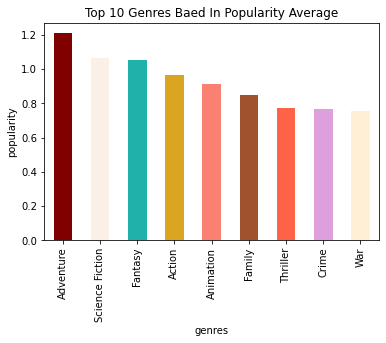

In [45]:
barplot(df,"genres")

As we can see from the figure that Adventure movies has the hight popularity

In [32]:
def myScatterPlot(df,xVar,yVar,color='#20B2AA'):
    #this function to bulid scatter plot it's take four argument dataset, x axis ,y axis ,color for plot
   
    #plot
    
    df.plot(x=xVar,y=yVar,kind='scatter',color=color,figsize=[10,5])
    
    #add title and format it 
    plt.title(f'Relationship between {xVar} and {yVar}'.title(),fontsize=14, weight="bold")
   
    #add X lable and format it 
    plt.xlabel(xVar.title(),fontsize=10, weight="bold")
    
     #add Y lable and format it 
    plt.ylabel(yVar.title(),fontsize=10, weight="bold")
    
    

### Research Question 3 (Do movie budgets effect in number of votes ?)

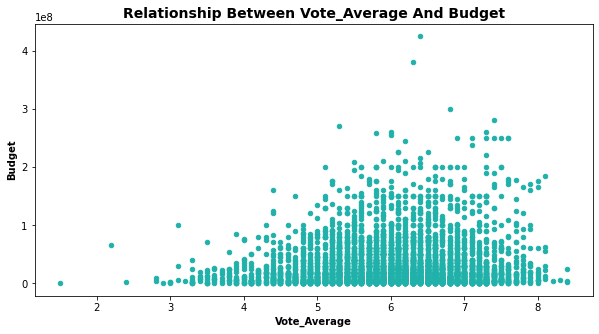

In [45]:
#call myScatterPlot
myScatterPlot(df,'vote_average','budget')

as we can see from the figure that The higher the budget, the higher the number of votes.

### Research Question 4 (Do movie budgets effect in  revenue?)

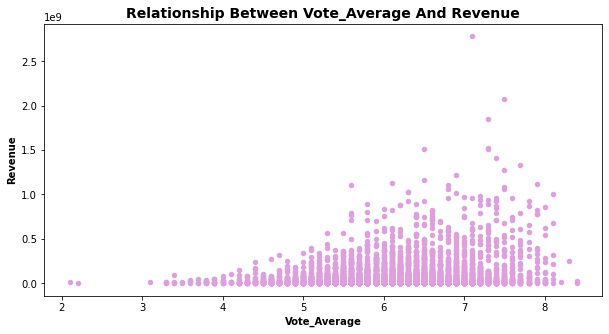

In [46]:
#call myScatterPlot
myScatterPlot(df,'vote_average','revenue', color = '#DDA0DD')


as we can see from the figure that  higher the vote the higher revenue.

### Research Question 5 (who are is the top directors?)

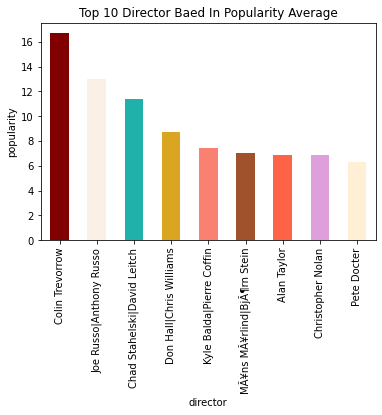

In [46]:
barplot(df,"director")

As we can see from the figure, the director woody Allen has the highest rating for his movie

### Research Question 6 (does movies number increase or decrease over years?)

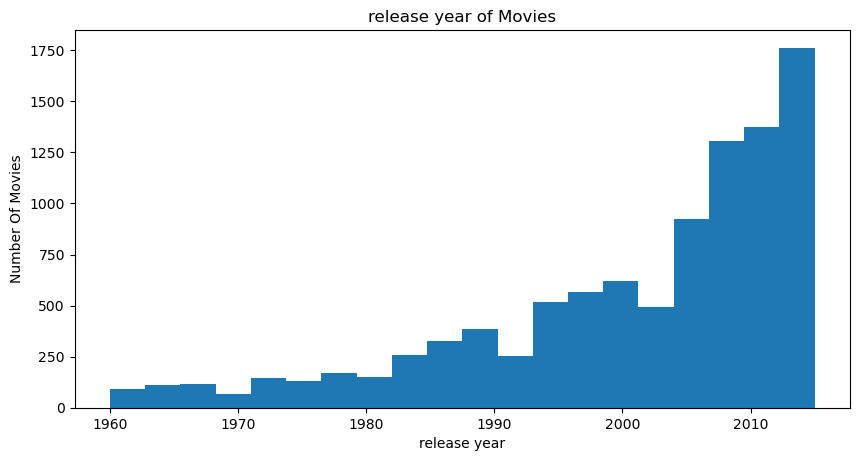

In [60]:
# histrogram for release year  and the number of movies

# figure size
plt.figure(figsize=(10,5), dpi = 100)

# x-axis name
plt.xlabel('release year')
# y-axis name 
plt.ylabel('Number Of Movies')
# histogram name
plt.title('release year of Movies')

# plot histrogram of release year
plt.hist(df['release_year'], bins =20);

as we can see from figure that movies number increase over years

<a id='conclusions'></a>
## Conclusions

>After analyzing the dataset, I came to the following conclusions:

>1-The production company could be the reason for the popularity of the movie

>2-authors may tend to write comedy and drama movie as they are the most popular

>3-coline trevorrow got the higher popularity so the actors may tend to work with him

>4- movies number increase over years,Which means that the acting career become increasingly popular over years

>Some of the limitations I encountered were that the data was large, making it difficult to extract useful information from it, and some of it contained null values



In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1